In [1]:
import pandas as pd
from utils.load_dataframe import load_dataframe

In [2]:
customers = load_dataframe('customer')
orders = load_dataframe('orders')
sellers = load_dataframe('sellers')
order_reviews = load_dataframe('order_reviews')


display(customers.dtypes)
display(orders.dtypes)
display(sellers.dtypes)
display(order_reviews.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
is_delivered                               bool
dtype: object

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [ ]:
# Tempo de entrega (em dias)
orders['delivery_time'] = (
    orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']    
).dt.days

# Tempo estimado da entrega (em dias)
orders['estimated_time'] = (
    orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']
).dt.days

orders['delivery_diff'] = orders['estimated_time'] - orders['delivery_time']

orders['delivery_status'] = orders['delivery_diff'].apply(
    lambda x: 'Atrasado' if x < 0 else ('Adiantado' if x > 0 else 'No prazo')
)

orders[['delivery_time', 'estimated_time']].mean()

delivery_time     12.094086
estimated_time    23.403958
dtype: float64

In [14]:
# Atrasos
delayed_orders = (orders['delivery_status'] == 'Atrasado')

delayed_orders_quantity = orders[delayed_orders].shape[0]
display(f'Quantidade de pedidos em atraso: {delayed_orders_quantity}')

total_orders = orders['order_status'].shape[0]


delay_rate = (delayed_orders_quantity / total_orders) * 100
display(f'porcentagem de atraso:  {delay_rate:.2f}%')


'Quantidade de pedidos em atraso: 7308'

'porcentagem de atraso:  7.35%'

In [ ]:
orders['delay_days'] = (
    orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']
).dt.days

delays = orders[delayed_orders]

avg_delay_days = delays['delay_days'].mean()
display(f'Média de dias em atraso: {avg_delay_days:.2f}')


'Dias em atraso: 9.50'

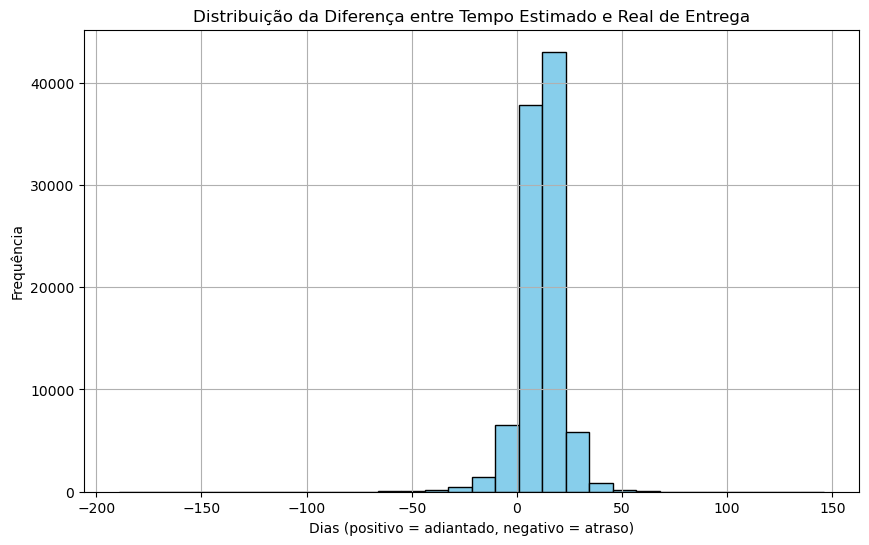

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
orders['delivery_diff'].dropna().plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title("Distribuição da Diferença entre Tempo Estimado e Real de Entrega")
plt.xlabel("Dias (positivo = adiantado, negativo = atraso)")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()
